In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from exchange import kraken_interface

In [63]:
exchange = kraken_interface.ExchangeInterface()


In [71]:
candles = exchange.get_candles()

2024-08-12 13:41:58 Kraken interface public request
2024-08-12 13:41:58 api_method: OHLC
2024-08-12 13:41:58 api_data: pair=XXBTZEUR&interval=1
2024-08-12 13:41:58 Made request
2024-08-12 13:41:58 Opening url...
2024-08-12 13:41:58 Done


In [72]:
ts = [float(x[3]) for x in candles['result']['XXBTZEUR']]

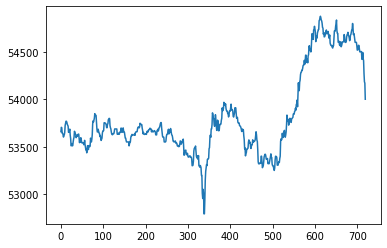

In [73]:
plt.plot(ts)

In [74]:
import pmdarima as pm

In [96]:
model = pm.auto_arima(ts, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=1,
                             start_P=0, seasonal=False,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7292.506, Time=4.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7320.200, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7292.359, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7289.906, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7318.306, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7291.629, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7291.658, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7293.469, Time=1.97 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7287.960, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7289.686, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7289.716, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7290.407, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7291.477, Time=0.52 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.507 seconds


In [92]:
model.conf_int()

array([[1.64322899e-01, 2.77867096e-01],
       [1.37934599e+03, 1.56427154e+03]])

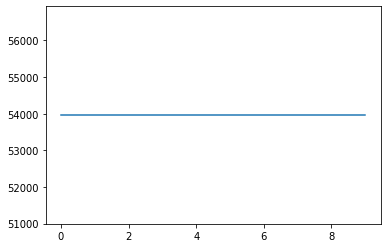

In [93]:
plt.plot(model.predict(10))

In [6]:
candles

{'error': [],
 'result': {'XXBTZEUR': [[1723243020,
    '55619.5',
    '55631.2',
    '55579.1',
    '55623.5',
    '55624.7',
    '0.00375901',
    6],
   [1723243080,
    '55603.3',
    '55614.3',
    '55603.3',
    '55612.3',
    '55606.4',
    '0.01279774',
    3],
   [1723243140,
    '55613.0',
    '55613.0',
    '55592.3',
    '55592.3',
    '55597.1',
    '0.00042704',
    2],
   [1723243200,
    '55585.3',
    '55627.3',
    '55585.2',
    '55610.7',
    '55600.0',
    '0.01039026',
    9],
   [1723243260,
    '55612.7',
    '55629.3',
    '55612.7',
    '55618.9',
    '55614.0',
    '0.01441327',
    7],
   [1723243320,
    '55584.7',
    '55584.7',
    '55562.3',
    '55562.3',
    '55583.5',
    '0.00946551',
    2],
   [1723243380,
    '55577.9',
    '55578.0',
    '55577.9',
    '55578.0',
    '55577.9',
    '0.00925616',
    3],
   [1723243440,
    '55589.5',
    '55589.5',
    '55575.5',
    '55580.7',
    '55577.1',
    '0.03277807',
    5],
   [1723243500,
    '55579.3